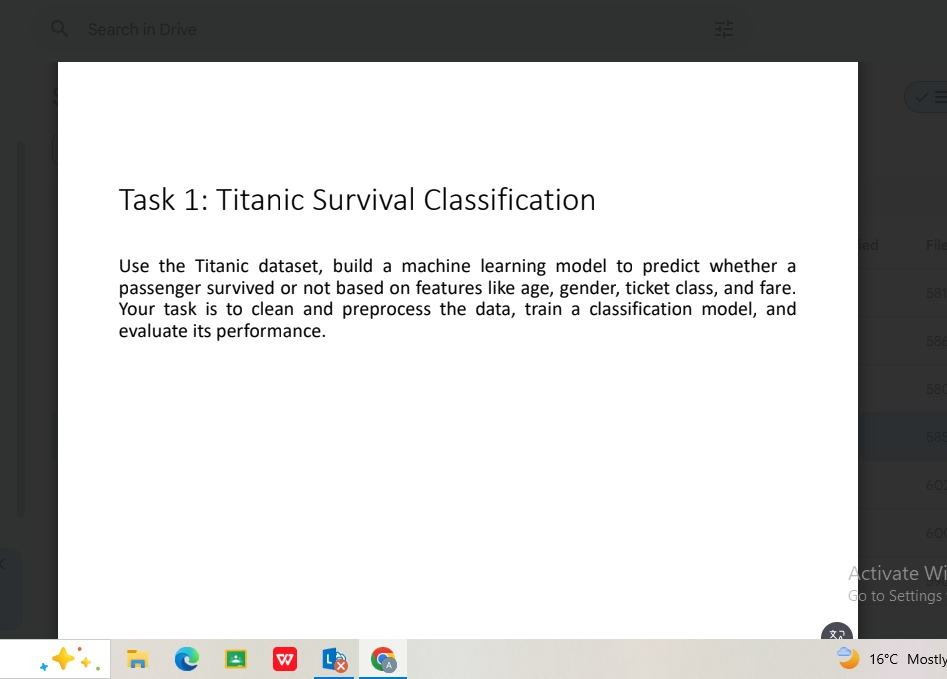

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Load the dataset titanic
df = pd.read_csv('/content/Titanic-Dataset[1].csv')

In [ ]:
# Handle Missing Values
df['Age'] = df['Age'].fillna(df['Age'].median())

In [ ]:
# Fill missing Embarked
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [ ]:
# Drop 'Cabin'
df.drop(columns=['Cabin'], inplace=True)

In [ ]:
# (Encoding)
# Sex: male = 0, female = 1
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

In [ ]:
# Embarked: S = 0, C = 1, Q = 2 (Mapping specific ports to numbers)
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

In [ ]:
# Select Features (Columns used for prediction)
# Dropping clomns that are identifiers or names
X = df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Survived'])
y = df['Survived']  # Target variable (0 = No, 1 = Yes)

In [ ]:
# Split Data into Training and Testing Sets (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize and Train the Model (Logistic Regression)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
#Make Predictions
y_pred = model.predict(X_test)

In [ ]:
# Print the Results
print("Model Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Model Accuracy Score: 0.7988826815642458

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



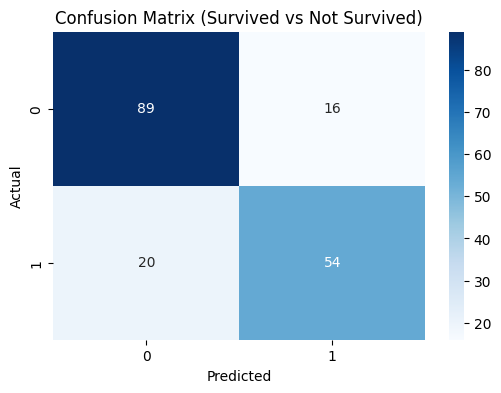

In [ ]:
# Visualize the Confusion Matrix (True vs False predictions)
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Survived vs Not Survived)')
plt.show()

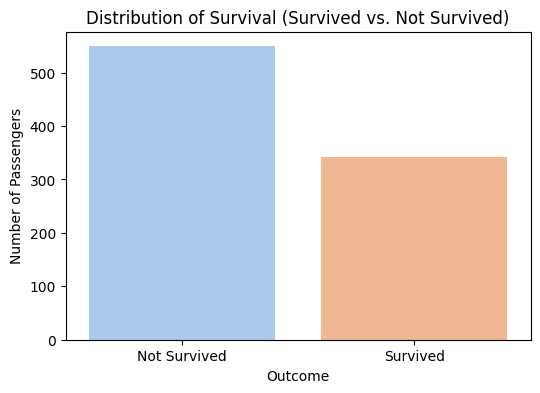


Exact numbers:
Not Survived: 549
Survived:     342


In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=df, hue='Survived', palette='pastel', legend=False)

plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.title('Distribution of Survival (Survived vs. Not Survived)')
plt.xlabel('Outcome')
plt.ylabel('Number of Passengers')
plt.show()
counts = df['Survived'].value_counts()
print("\nExact numbers:")
print(f"Not Survived: {counts[0]}")
print(f"Survived:     {counts[1]}")